# Expected Runs Generator

This notebook illustrates how to import a trained model that predicts the expected runs to be scored by a batter in a given situation. The situation here is defined by a combination of (Innings Phase, Team Wickets Lost, Ball No For Batter).

The model was trained using XGBoost over 589,000 balls from 2588 T20 games since 2015, including high-level T20Is, IPL, PSL, CPL, BBL games. The model accounts for the "settling in" phase of batters.  

The innings phase is coded as follows:

* 1: Powerplay (1-6)
* 2: Middle 1 (7-11)
* 3: Middle 2 (12-16)
* 4: Death (17-20)

To begin, we import the model, which is provided as a binary file with this notebook.

In [2]:
import pickle
model = pickle.load(open('raa_model_1.mdl','rb')) # imported as sklearn model

As a basic example, to predict the expected runs for a batter facing his 15th ball in phase 4 with 2 innings wickets lost, we run the following code:

In [3]:
model.predict([[4,2,15]])

array([1.9183381], dtype=float32)

As another example, if we wanted to see how the expected runs progress as a batter settles down in Phase 2 (Overs 7-11) with his team having lost 2 wickets:

In [4]:
import numpy as np
# The input to the model is of the form [Phase,Wkts,Ball]. This makes inputs from ball 1 to 25
xs = np.array([[2,2,i] for i in range(1,26)])

runs = model.predict(xs) # the predicted runs

print(runs)

[0.74398965 0.88172495 0.97071874 1.0648263  1.1019783  1.1559036
 1.180978   1.1969091  1.2279571  1.2449601  1.2500232  1.257376
 1.257376   1.2570008  1.2567008  1.2583953  1.2583953  1.2583953
 1.2583953  1.2583953  1.2583953  1.2583953  1.2583953  1.2583953
 1.2583953 ]


Now, if we wanted to plot expected runs curves for different phases with 2 wickets lost:

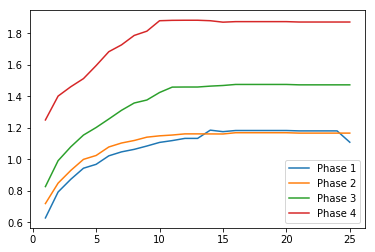

In [10]:
import matplotlib.pyplot as plt
import numpy as np

wkts = 3
balls = range(1,26)

for phase in [1,2,3,4]:

    xs = np.array([[phase,wkts,ballno] for ballno in balls])
    runs = model.predict(xs) # the predicted runs
    plt.plot(balls,runs,label = 'Phase {}'.format(phase))
    
plt.legend()


In [6]:
xs

array([[ 4,  2, 25],
       [ 4,  2, 25],
       [ 4,  2, 25],
       [ 4,  2, 25],
       [ 4,  2, 25],
       [ 4,  2, 25],
       [ 4,  2, 25],
       [ 4,  2, 25],
       [ 4,  2, 25],
       [ 4,  2, 25],
       [ 4,  2, 25],
       [ 4,  2, 25],
       [ 4,  2, 25],
       [ 4,  2, 25],
       [ 4,  2, 25],
       [ 4,  2, 25],
       [ 4,  2, 25],
       [ 4,  2, 25],
       [ 4,  2, 25],
       [ 4,  2, 25],
       [ 4,  2, 25],
       [ 4,  2, 25],
       [ 4,  2, 25],
       [ 4,  2, 25],
       [ 4,  2, 25]])